In [ ]:
from sklearn.decomposition import PCA
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the timeframe
end_date = datetime(2025, 3, 9)  # Year, Month, Day
start_date = datetime(2022, 2, 1)  # Year, Month, Day

# Retrieve FTSE 100 Index data (daily closing prices)
ftse_ticker = "^FTSE"
ftse_data = yf.download(ftse_ticker, start=start_date, end=end_date, interval="1d")
ftse_closing_prices = ftse_data['Close']
print("FTSE 100 Index Daily Closing Data Retrieved:\n", ftse_closing_prices)

# Retrieve the FTSE 100 constituent stocks (daily closing prices)
# Replace the list below with the full list of FTSE 100 tickers
ftse_100_tickers =  [
    "AAF.L", "AAL.L", "ABF.L", "ADM.L", "AHT.L", "ALW.L", "ANTO.L", "AUTO.L", "AV.L", "AZN.L",
    "BA.L", "BARC.L", "BATS.L", "BEZ.L", "BKG.L", "BLND.L", "BNZL.L", "BP.L", "BT-A.L", "BTRW.L",
    "CCH.L", "CNA.L", "CPG.L", "CRDA.L", "CTEC.L", "DCC.L", "DGE.L", "DPLM.L", "EDV.L", "ENT.L",
    "EXPN.L", "EZJ.L", "FCIT.L", "FRES.L", "GAW.L", "GLEN.L", "GSK.L", "HIK.L", "HL.L", "HLMA.L",
    "HLN.L", "HSBA.L", "HSX.L", "HWDN.L", "IAG.L", "ICG.L", "IHG.L", "III.L", "IMB.L", "IMI.L",
    "INF.L", "ITRK.L", "JD.L", "KGF.L", "LAND.L", "LGEN.L", "LLOY.L", "LMP.L", "LSEG.L", "MKS.L",
    "MNDI.L", "MNG.L", "MRO.L", "NG.L", "NWG.L", "NXT.L", "PCT.L", "PHNX.L", "PRU.L", "PSH.L",
    "PSN.L", "PSON.L", "REL.L", "RIO.L", "RKT.L", "RMV.L", "RR.L", "RTO.L", "SBRY.L", "SDR.L",
    "SGE.L", "SGRO.L", "SHEL.L", "SMIN.L", "SMT.L", "SN.L", "SPX.L", "SSE.L", "STAN.L", "STJ.L",
    "SVT.L", "TSCO.L", "TW.L", "ULVR.L", "UTG.L", "UU.L", "VOD.L", "WEIR.L", "WPP.L", "WTB.L"
]

# Initialize a DataFrame to store the closing prices of all tickers
closing_prices = pd.DataFrame()

# Download data for each ticker
for ticker in ftse_100_tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    closing_prices[ticker] = data['Close']

print("FTSE 100 Constituents Daily Closing Data:\n", closing_prices)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FTSE 100 Index Daily Closing Data Retrieved:
 Ticker            ^FTSE
Date                   
2022-02-01  7535.799805
2022-02-02  7583.000000
2022-02-03  7528.799805
2022-02-04  7516.399902
2022-02-07  7573.500000
...                 ...
2025-03-03  8871.299805
2025-03-04  8759.000000
2025-03-05  8755.799805
2025-03-06  8682.799805
2025-03-07  8679.900391

[782 rows x 1 columns]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

FTSE 100 Constituents Daily Closing Data:
                  AAF.L        AAL.L        ABF.L        ADM.L        AHT.L  \
Date                                                                         
2022-02-01  143.311539  3326.504639  1954.836426  3047.807129  5259.285645   
2022-02-02  146.049988  3317.515381  1958.334473  3076.776611  5348.593262   
2022-02-03  143.128983  3312.021973  1939.345581  3008.847412  5118.376465   
2022-02-04  141.485916  3318.514160  1883.379028  2955.903076  4969.528320   
2022-02-07  141.485916  3378.941650  1909.363525  2995.861328  4901.058105   
...                ...          ...          ...          ...          ...   
2025-03-03  143.300003  2360.500000  1895.500000  2908.000000  4799.000000   
2025-03-04  141.300003  2301.000000  1851.000000  2891.000000  4404.000000   
2025-03-05  142.199997  2408.000000  1853.500000  2901.000000  4526.000000   
2025-03-06  142.699997  2462.500000  1897.000000  3046.000000  4575.000000   
2025-03-07  145.39999

In [ ]:
# adding FTSE to DF
closing_prices["FTSE"] = ftse_data['Close']
closing_prices

<ipython-input-3-c4972e75f1ce>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closing_prices["FTSE"] = ftse_data['Close']


,AAF.L,AAL.L,ABF.L,ADM.L,AHT.L,ALW.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L,FTSE
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,143.311539,3326.504639,1954.836426,3047.807129,5259.285645,991.247009,1360.066895,669.712097,459.189270,8502.222656,...,299.623505,151.150406,3744.682373,1039.982056,1081.030273,127.840828,1742.545532,1159.399170,3080.529541,7535.799805
2022-02-02,146.049988,3317.515381,1958.334473,3076.776611,5348.593262,999.240967,1282.648560,685.969299,462.041443,8575.163086,...,301.621033,153.594727,3778.144043,1052.969604,1081.529541,132.196777,1761.035645,1176.875122,3051.552979,7583.000000
2022-02-03,143.128983,3312.021973,1939.345581,3008.847412,5118.376465,981.254578,1257.175415,655.437683,464.682220,8351.342773,...,296.677246,152.048325,3799.119629,1039.482544,1062.056030,133.455612,1724.055908,1159.898560,3002.592041,7528.799805
2022-02-04,141.485916,3318.514160,1883.379028,2955.903076,4969.528320,977.257568,1225.708618,648.300354,459.717377,8275.403320,...,295.179108,149.005356,3810.606445,1013.508057,1033.594727,134.095001,1675.082764,1181.868042,2965.621826,7516.399902
2022-02-07,141.485916,3378.941650,1909.363525,2995.861328,4901.058105,985.251526,1232.201782,648.300354,464.048492,8341.348633,...,291.034332,149.753632,3854.056396,1003.517822,1031.098145,137.272034,1676.082153,1170.383911,3013.583252,7573.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,143.300003,2360.500000,1895.500000,2908.000000,4799.000000,1266.000000,1780.500000,788.599976,542.400024,11904.000000,...,378.000000,111.599998,4539.000000,828.500000,963.599976,70.680000,2464.000000,639.400024,2667.000000,8871.299805
2025-03-04,141.300003,2301.000000,1851.000000,2891.000000,4404.000000,1216.000000,1710.000000,780.400024,533.799988,12064.000000,...,388.700012,111.699997,4617.000000,827.000000,976.200012,69.820000,2344.000000,618.599976,2526.000000,8759.000000
2025-03-05,142.199997,2408.000000,1853.500000,2901.000000,4526.000000,1214.000000,1820.500000,772.000000,541.799988,12062.000000,...,379.000000,111.550003,4538.000000,813.500000,944.400024,69.540001,2440.000000,610.200012,2547.000000,8755.799805


In [ ]:
missing_values = closing_prices.isna().sum()
filtered_missing_values = missing_values[missing_values > 0]
print("Missing values per column:\n", filtered_missing_values)

Missing values per column:
 BP.L        1
CRDA.L      1
CTEC.L      1
DGE.L       1
GLEN.L      1
HLN.L     114
IAG.L       3
IMB.L       1
SN.L        1
dtype: int64


In [ ]:
closing_prices["BP.L"] # ILSE: ACCOUNT FOR STOCKS WITH 1 MISSING VALUE!!

,BP.L
Date,
2022-02-01,392.677338
2022-02-02,388.933258
2022-02-03,391.778809
2022-02-04,405.257385
2022-02-07,408.003113
...,...
2025-03-03,432.750000
2025-03-04,408.000000
2025-03-05,408.200012


In [ ]:
# Drop columns with missing values
closing_prices_cleaned = closing_prices.dropna(axis=1)
print("Shape before cleaning (includes all columns):", closing_prices.shape)
print("Shape after cleaning (dropped columns with many missing values):", closing_prices_cleaned.shape)

Shape before cleaning (includes all columns): (782, 101)
Shape after cleaning (dropped columns with many missing values): (782, 92)


In [ ]:
closing_prices_cleaned

,AAF.L,AAL.L,ABF.L,ADM.L,AHT.L,ALW.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L,FTSE
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,143.311539,3326.504639,1954.836426,3047.807129,5259.285645,991.247009,1360.066895,669.712097,459.189270,8502.222656,...,299.623505,151.150406,3744.682373,1039.982056,1081.030273,127.840828,1742.545532,1159.399170,3080.529541,7535.799805
2022-02-02,146.049988,3317.515381,1958.334473,3076.776611,5348.593262,999.240967,1282.648560,685.969299,462.041443,8575.163086,...,301.621033,153.594727,3778.144043,1052.969604,1081.529541,132.196777,1761.035645,1176.875122,3051.552979,7583.000000
2022-02-03,143.128983,3312.021973,1939.345581,3008.847412,5118.376465,981.254578,1257.175415,655.437683,464.682220,8351.342773,...,296.677246,152.048325,3799.119629,1039.482544,1062.056030,133.455612,1724.055908,1159.898560,3002.592041,7528.799805
2022-02-04,141.485916,3318.514160,1883.379028,2955.903076,4969.528320,977.257568,1225.708618,648.300354,459.717377,8275.403320,...,295.179108,149.005356,3810.606445,1013.508057,1033.594727,134.095001,1675.082764,1181.868042,2965.621826,7516.399902
2022-02-07,141.485916,3378.941650,1909.363525,2995.861328,4901.058105,985.251526,1232.201782,648.300354,464.048492,8341.348633,...,291.034332,149.753632,3854.056396,1003.517822,1031.098145,137.272034,1676.082153,1170.383911,3013.583252,7573.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,143.300003,2360.500000,1895.500000,2908.000000,4799.000000,1266.000000,1780.500000,788.599976,542.400024,11904.000000,...,378.000000,111.599998,4539.000000,828.500000,963.599976,70.680000,2464.000000,639.400024,2667.000000,8871.299805
2025-03-04,141.300003,2301.000000,1851.000000,2891.000000,4404.000000,1216.000000,1710.000000,780.400024,533.799988,12064.000000,...,388.700012,111.699997,4617.000000,827.000000,976.200012,69.820000,2344.000000,618.599976,2526.000000,8759.000000
2025-03-05,142.199997,2408.000000,1853.500000,2901.000000,4526.000000,1214.000000,1820.500000,772.000000,541.799988,12062.000000,...,379.000000,111.550003,4538.000000,813.500000,944.400024,69.540001,2440.000000,610.200012,2547.000000,8755.799805


In [ ]:
# Create log returns to remove stationarity
log_returns = np.log(closing_prices_cleaned / closing_prices_cleaned.shift(1))

# Drop NaN values caused by the shift
log_returns = log_returns.dropna().drop(columns="FTSE")

In [ ]:
# Creating X of the closing prices (absolute prices)
X_abs = closing_prices_cleaned.drop(columns="FTSE").dropna()
stock_features = X_abs.columns
X_abs.shape

(782, 91)

In [ ]:
# Creating X of the closing prices (log returns)
X_log = log_returns.copy()
stock_log_features = X_log.columns
X_log.shape

(781, 91)

In [ ]:
# Preprocessing ABS (data must be centered around its mean before PCA)
scaler = StandardScaler()
scaler.fit(X_abs)
X_abs = pd.DataFrame(scaler.transform(X_abs), columns=stock_features)
X_abs

,AAF.L,AAL.L,ABF.L,ADM.L,AHT.L,ALW.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
0,2.003978,1.252572,-0.145733,2.075308,0.414738,-0.701261,-0.809812,-0.072935,0.445614,-2.709762,...,1.239648,0.305771,1.319855,-1.032154,0.882525,0.853369,1.879503,-0.435910,3.095357,0.221440
1,2.210418,1.236801,-0.135665,2.173373,0.568826,-0.635409,-1.072323,0.089337,0.522135,-2.628631,...,1.391032,0.350550,1.452692,-0.940558,1.021873,0.862418,2.081626,-0.357748,3.257888,0.132335
2,1.990216,1.227164,-0.190318,1.943425,0.171620,-0.783576,-1.158698,-0.215415,0.592985,-2.877584,...,1.083218,0.239725,1.368652,-0.883141,0.877166,0.509446,2.140038,-0.514069,3.100002,-0.018224
3,1.866352,1.238554,-0.351400,1.764203,-0.085196,-0.816502,-1.265396,-0.286657,0.459783,-2.962050,...,0.881375,0.206142,1.203281,-0.851698,0.598477,-0.006437,2.169706,-0.721090,3.304323,-0.131911
4,1.866352,1.344564,-0.276612,1.899466,-0.203331,-0.750650,-1.243379,-0.286657,0.575983,-2.888700,...,0.694667,0.113229,1.243947,-0.732761,0.491288,-0.051690,2.317126,-0.716866,3.197518,0.015575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2.003109,-0.442125,-0.316513,1.602045,-0.379418,1.562078,0.615800,1.113748,2.678084,1.073987,...,-1.106661,2.062732,-0.829522,1.142153,-1.386536,-1.275146,-0.772852,2.613844,-1.740760,-1.050199
778,1.852337,-0.546508,-0.444592,1.544498,-1.060933,1.150192,0.376747,1.031900,2.447352,1.251953,...,-0.717627,2.302593,-0.824087,1.355664,-1.402630,-1.046760,-0.812758,2.106577,-1.934205,-1.483787
779,1.920184,-0.358794,-0.437396,1.578350,-0.850440,1.133717,0.751433,0.948054,2.661985,1.249728,...,-1.288547,2.085148,-0.832239,1.139415,-1.547476,-1.623159,-0.825750,2.512391,-2.012327,-1.419210
780,1.957877,-0.263183,-0.312196,2.069191,-0.765897,1.183143,0.897238,0.981992,2.501011,1.211911,...,-1.435066,2.015656,-0.905605,1.139415,-1.772792,-1.539781,-0.822966,2.681480,-1.822602,-1.468411


In [ ]:
# Preprocessing LOG (data must be centered around its mean before PCA)
scaler.fit(X_log)
X_log = pd.DataFrame(scaler.transform(X_log), columns=stock_log_features, index=log_returns.index)
X_log

,AAF.L,AAL.L,ABF.L,ADM.L,AHT.L,ALW.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-02,0.904936,-0.089273,0.116523,0.503756,0.807342,0.784711,-2.518148,1.486713,0.398232,0.558168,...,0.720531,0.521453,0.881306,0.778887,0.054536,0.041740,2.120388,0.556669,0.848276,-0.539661
2022-02-03,-0.967709,-0.048176,-0.624544,-1.184613,-2.076062,-1.856410,-0.872852,-2.858238,0.365491,-1.854911,...,-1.421732,-1.384321,-0.524317,0.475696,-0.053723,-1.220365,0.632033,-1.193860,-0.742616,-0.934473
2022-02-04,-0.553433,0.093509,-1.880217,-0.941731,-1.389562,-0.436619,-1.098587,-0.696813,-0.726554,-0.660926,...,-0.943162,-0.441434,-1.066825,0.248504,-0.106839,-1.829650,0.341042,-1.612221,1.053424,-0.712194
2022-02-07,-0.000887,0.723933,0.882203,0.714495,-0.648335,0.796257,0.208863,-0.012446,0.609788,0.516434,...,-0.883334,-1.188123,0.288519,0.999246,-0.040950,-0.153360,1.495424,0.008078,-0.485529,0.957303
2022-02-08,-4.294199,1.231423,0.554267,-0.783835,0.296277,-0.229812,0.276462,-0.820451,0.723704,-0.561680,...,0.553474,0.045489,0.340568,0.396083,-0.021201,0.760798,-0.036211,-0.852178,0.567958,1.038168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,0.233455,0.425633,0.018584,0.607481,-0.049975,0.453858,1.125187,1.026516,-0.257527,-0.400740,...,-1.868415,-0.502358,-0.816617,1.015900,-0.034565,-1.146581,0.484728,0.740643,-0.345488,-0.138635
2025-03-04,-0.673505,-0.983688,-1.525066,-0.310176,-4.061920,-4.087725,-1.741070,-0.665774,-1.074650,0.889815,...,2.147731,2.270776,0.067498,1.513697,-0.006320,0.890502,-0.713318,-2.775115,-1.742826,-3.174139
2025-03-05,0.302960,1.797972,0.088367,0.184674,1.304396,-0.191061,2.656050,-0.688872,0.975011,-0.042390,...,-3.133579,-2.103586,-0.052822,-1.581475,-0.068987,-2.232961,-0.203920,2.186366,-0.696323,0.501419


In [ ]:
# Compute Principal Components
pca = PCA()
pca.fit(X_abs)

PCA()

In [ ]:
# Access PCs
W = pca.components_
# Print PCs as COLUMNS
T = pd.DataFrame(W.T,
                 index=stock_features,
                 columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91
AAF.L,-0.036778,0.127917,-0.117870,-0.117806,-0.083343,-0.087998,-0.018116,0.416950,0.128348,0.205698,...,0.021315,0.033733,0.023240,0.009944,0.002151,0.006276,0.013238,-0.000870,0.021014,-0.011830
AAL.L,-0.093050,0.134002,-0.124578,0.056078,0.042145,0.168502,0.012297,-0.033537,-0.182662,0.145908,...,-0.136930,0.023325,0.131023,0.036144,0.084874,0.006734,-0.061615,-0.006225,-0.014773,0.023891
ABF.L,0.113242,0.021432,0.202341,0.017596,0.071990,0.044261,-0.040643,-0.028577,-0.004451,0.072001,...,-0.023645,-0.040439,-0.001347,0.051844,-0.086865,-0.020629,-0.047303,-0.004053,0.014591,0.027567
ADM.L,0.102682,0.116299,0.078887,-0.080557,-0.078968,0.044092,-0.106036,0.015145,0.034183,0.112519,...,-0.012157,0.024267,0.011585,-0.025933,-0.003479,0.007650,-0.013426,0.048590,-0.048156,-0.008961
AHT.L,0.099524,0.001555,0.089867,0.161400,-0.025936,0.165257,-0.054276,-0.233381,0.079697,-0.100053,...,-0.025510,0.000027,-0.011776,0.053142,0.030694,0.014695,0.030835,0.004311,-0.020611,-0.027914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UU.L,-0.011466,0.156824,0.076561,0.049476,0.025303,-0.197450,0.327890,-0.235616,-0.048925,0.157406,...,-0.067679,-0.003290,0.034013,0.037804,-0.063841,0.016436,0.021200,-0.011241,0.046142,0.025900
VOD.L,-0.120124,0.124233,-0.084358,-0.061260,0.012213,-0.032846,-0.061246,0.024261,-0.014284,0.002729,...,0.049581,0.099880,-0.115109,-0.090174,-0.042230,0.063418,-0.075362,0.006079,-0.092041,0.086774
WEIR.L,0.137282,0.014743,-0.025989,0.103771,-0.076831,0.080891,0.048111,-0.007962,-0.017282,0.055610,...,0.024454,0.053686,-0.056797,-0.068675,-0.003567,-0.078684,-0.041191,0.023956,-0.025366,-0.002975
WPP.L,-0.074689,0.146420,-0.018774,0.184541,-0.119984,0.127565,-0.072983,-0.161770,-0.072263,-0.031496,...,0.031959,-0.017173,0.003600,-0.063935,-0.003035,-0.020848,-0.018402,0.036711,0.032418,-0.004079


In [ ]:
# Compute Principal Components log returns
pca2 = PCA()
pca2.fit(X_log)

PCA()

In [ ]:
# Access PCs
W2 = pca2.components_
# Print PCs as COLUMNS
T_log = pd.DataFrame(W2.T,
                 index=stock_features,
                 columns=[f'PC{i}' for i in range(1, pca2.n_components_+1)])
T_log

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91
AAF.L,0.079432,-0.010387,0.102240,0.004885,0.036525,0.092591,-0.049129,0.051784,-0.093225,-0.221880,...,-0.014874,-0.035188,0.000801,-0.011445,0.042022,0.013597,-0.017521,0.008764,0.003226,0.028846
AAL.L,0.069623,-0.145515,0.042635,-0.202598,0.289988,0.096782,-0.025606,-0.040579,-0.047911,0.032004,...,-0.106526,0.207059,0.086112,-0.068392,0.107598,0.048963,0.007046,-0.022871,0.010454,-0.075432
ABF.L,0.115373,-0.014719,0.044107,0.010806,-0.153657,0.219564,0.061901,-0.057659,0.009462,0.030917,...,-0.071744,0.047594,-0.042257,-0.046252,0.036781,-0.001239,0.005011,-0.030363,-0.019637,0.020962
ADM.L,0.082928,0.013546,0.052704,0.036018,-0.023217,0.032982,-0.169879,0.197450,0.238464,0.270886,...,0.045964,0.039489,-0.068595,-0.030281,0.023137,-0.013406,-0.001753,-0.061116,-0.015878,-0.007237
AHT.L,0.125189,-0.063846,-0.127351,-0.005409,0.031332,-0.007413,0.018432,-0.018703,0.043914,-0.070282,...,0.138941,0.028897,-0.143569,-0.140761,0.033874,0.013590,-0.064171,-0.091632,-0.012870,0.002211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UU.L,0.072214,0.299390,0.097918,-0.058301,0.133728,-0.059623,-0.034955,-0.147110,0.174682,-0.083022,...,-0.028917,0.026081,0.038591,0.205143,0.046268,-0.097863,-0.273096,0.211243,-0.036379,-0.551918
VOD.L,0.069963,0.065487,0.187722,-0.015478,-0.024468,0.057556,-0.057235,-0.147478,-0.114921,-0.142051,...,-0.039083,0.018099,0.055650,-0.008575,-0.004560,-0.024514,-0.036883,-0.011204,0.016266,-0.026762
WEIR.L,0.124840,-0.123115,-0.043963,-0.029808,0.061564,0.066350,0.009597,0.073966,0.095566,0.007849,...,0.036082,0.005284,-0.095539,0.047082,-0.150188,-0.000166,-0.005888,-0.071228,0.030853,0.012918
WPP.L,0.123836,-0.034875,0.013144,-0.000806,-0.039462,0.059687,0.048964,-0.090361,-0.097866,0.065213,...,-0.013225,0.042501,0.079728,-0.004854,0.040603,-0.025171,0.010178,-0.017538,-0.039162,0.001276


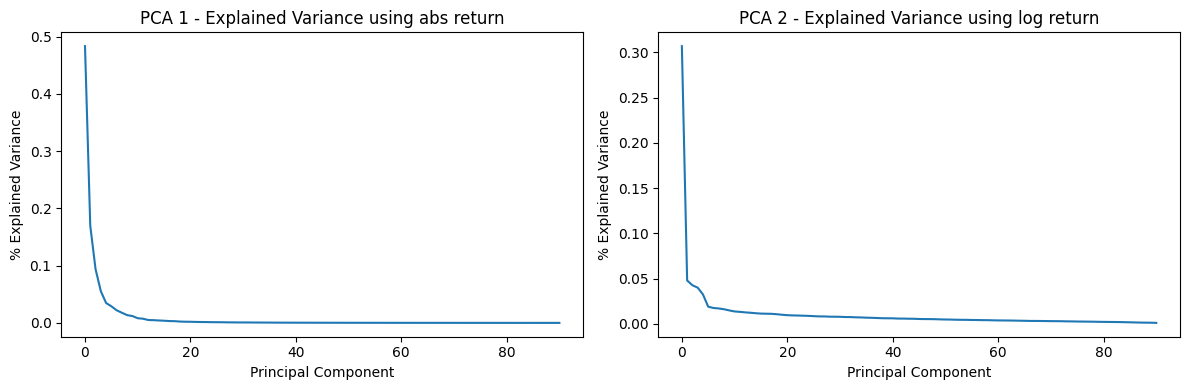

In [ ]:
# pca.explained_variance_ratio_ and pca2.explained_variance_ratio_ (absolute vs log return)
explained_variance_1 = pca.explained_variance_ratio_
explained_variance_2 = pca2.explained_variance_ratio_

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first PCA - abs
axes[0].plot(explained_variance_1)
axes[0].set_title('PCA 1 - Explained Variance using abs return')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('% Explained Variance')

# Plot the second PCA - log
axes[1].plot(explained_variance_2)
axes[1].set_title('PCA 2 - Explained Variance using log return')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('% Explained Variance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

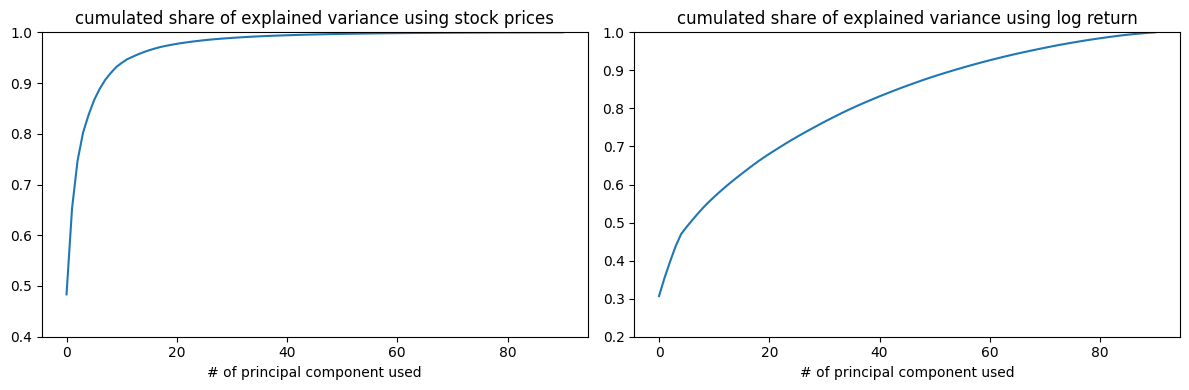

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# first PCA - ABS
axes[0].plot(np.cumsum(explained_variance_1))
axes[0].set_title('cumulated share of explained variance using stock prices')
axes[0].set_xlabel('# of principal component used')

# second PCA - log
axes[1].plot(np.cumsum(explained_variance_2))
axes[1].set_title('cumulated share of explained variance using log return')
axes[1].set_xlabel('# of principal component used')

# Adjust the y-axis scale
axes[0].set_ylim(0.4, 1.0)  # Adjust scale for subplot 1
axes[1].set_ylim(0.2, 1.0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Picking stocks most closely mimicking the index (based on log returns method)

# Keeping only PC1 and PC2
T_log = T_log.iloc[:, :4]

# adding column showing cum PC1+PC2
T_log["PC_sum"] = T_log["PC1"]+T_log["PC2"]+T_log["PC3"]+T_log["PC4"]

# Sort by PC_sum
T_log_sorted = T_log.sort_values("PC_sum", ascending=False)
T_log_sorted = T_log_sorted.reset_index()
T_log_sorted.rename(columns={T_log_sorted.columns[0]: "Stocks" }, inplace = True)

# Calculate the sum of 'PC_sum' for the top 5 rows
top_5_sum = T_log_sorted["PC_sum"].head(5).sum()

# Add the 'pf_weights' column by dividing each stock's 'PC_sum' by the top 5 sum
T_log_sorted["pf_weights"] = T_log_sorted["PC_sum"] /top_5_sum
# Set weights to 0 for rows beyond the top 5
T_log_sorted.loc[5:, "pf_weights"] = 0

T_log_sorted.head(10)

<ipython-input-20-f321eb7ce778>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_log["PC_sum"] = T_log["PC1"]+T_log["PC2"]+T_log["PC3"]+T_log["PC4"]


,Stocks,PC1,PC2,PC3,PC4,PC_sum,pf_weights
0,NG.L,0.061184,0.289552,0.160228,0.000563,0.511527,0.216393
1,ULVR.L,0.050784,0.097732,0.138055,0.220740,0.507311,0.214610
2,GSK.L,0.041152,0.126733,0.151692,0.151476,0.471054,0.199272
3,BATS.L,0.048446,0.046480,0.229487,0.125143,0.449555,0.190177
4,SVT.L,0.067457,0.305484,0.093145,-0.041657,0.424428,0.179548
5,REL.L,0.089980,0.130116,-0.075321,0.273513,0.418288,0.000000
6,UU.L,0.072214,0.299390,0.097918,-0.058301,0.411222,0.000000
7,CPG.L,0.090046,0.020510,0.049175,0.243946,0.403677,0.000000
8,SSE.L,0.080933,0.216860,0.126651,-0.026810,0.397633,0.000000
9,RKT.L,0.041202,0.089979,0.071521,0.177817,0.380519,0.000000


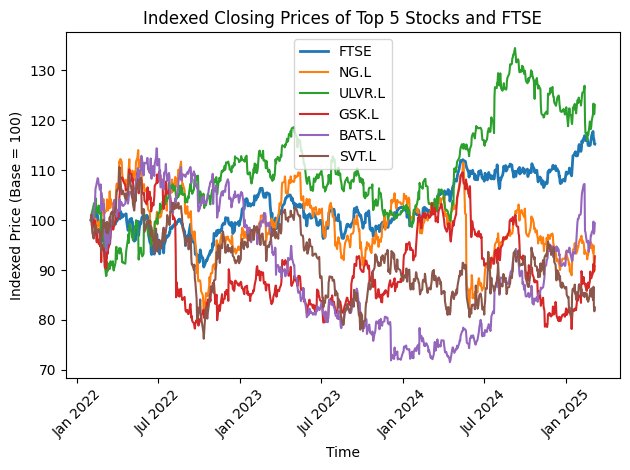

In [ ]:
import matplotlib.dates as mdates
# Index the data by dividing each stock's prices by its first value
indexed_data = closing_prices / closing_prices.iloc[0] * 100

# Retrieve the top 5 stocks from the "Stocks" column of T_log_sorted
top_5_stocks = T_log_sorted["Stocks"].head(5)

# Plot the FTSE index
plt.plot(indexed_data["FTSE"], label="FTSE", linewidth=2)

# Plot each of the top 5 stocks dynamically
for stock in top_5_stocks:
    if stock in indexed_data.columns:  # Ensure the stock is in the data
        plt.plot(indexed_data[stock], label=stock)

# Add a legend to distinguish the lines
plt.legend()

# Format the dates on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show dates every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"

# Add titles and labels
plt.title("Indexed Closing Prices of Top 5 Stocks and FTSE")
plt.xlabel("Time")
plt.ylabel("Indexed Price (Base = 100)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


(array([18993., 19113., 19236., 19358., 19478., 19601., 19723., 19844.,
        19967., 20089., 20209.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01'),
  Text(19844.0, 0, '2024-05'),
  Text(19967.0, 0, '2024-09'),
  Text(20089.0, 0, '2025-01'),
  Text(20209.0, 0, '2025-05')])

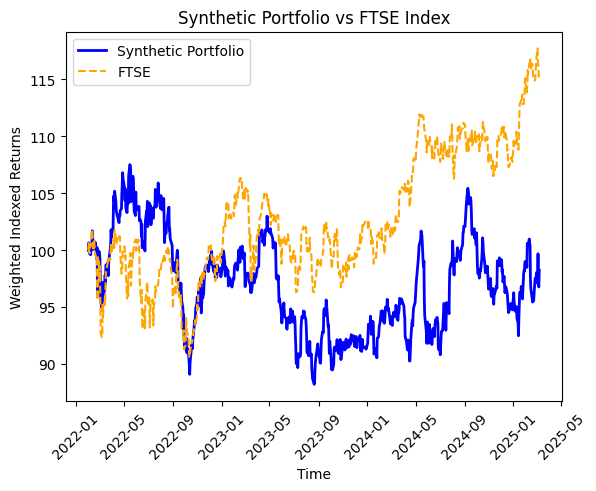

In [ ]:
# Extract the top 5 stocks and their weights to make a replicating portfolio
top_5_stocks = T_log_sorted["Stocks"].head(5)
top_5_weights = T_log_sorted["pf_weights"].head(5)

# Calculate the weighted sumproduct (dot product of weights and indexed returns)
weighted_returns = (indexed_data[top_5_stocks] * top_5_weights.values).sum(axis=1)

# Plot the weighted returns
plt.plot(weighted_returns, label="Synthetic Portfolio", color="blue", linewidth=2)

# Plot the FTSE index for comparison
plt.plot(indexed_data["FTSE"], label="FTSE", color="orange", linestyle="--")

# Add legend, labels, and title
plt.legend()
plt.title("Synthetic Portfolio vs FTSE Index")
plt.xlabel("Time")
plt.ylabel("Weighted Indexed Returns")
plt.xticks(rotation=45)

# Show the plot

In [ ]:
window = 100 # n of trading days
dates = X_log.index[window:]  # Align dates with the end of each rolling window

# Placeholder for summed PCs for all stocks (full data)
summed_pcs_full = {}

def rolling_pca(window_start):
    pca_roll = PCA()
    # Create the rolling window data excluding today's data
    window_data = X_log.iloc[window_start:window_start + window - 1, :]  # Exclude today's row
    # Fit PCA to the rolling window
    pca_roll.fit(window_data)
    # Extract loadings (components matrix)
    loadings_matrix = pca_roll.components_.T  # Transpose to get stocks as rows

    # Sum the first 4 PCs for each stock
    summed_values = loadings_matrix[:, :4].sum(axis=1)  # Sum across the first 4 PCs
    summed_pcs_full[dates[window_start]] = pd.Series(summed_values, index=X_log.columns)  # Store as Series

# Iterate through rolling windows
for start in range(len(X_log) - window):
    rolling_pca(start)

# Combine results into a full DataFrame (dates as rows, stocks as columns)
summed_pcs_full_df = pd.DataFrame(summed_pcs_full).T  # Transpose to align dates as rows
summed_pcs_full_df.index.name = "Date"  # Set index name

In [ ]:
summed_pcs_full_df

,AAF.L,AAL.L,ABF.L,ADM.L,AHT.L,ALW.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-29,0.118323,0.371901,-0.128652,0.098714,0.152241,0.226411,0.409846,0.232507,0.090356,0.296749,...,0.453620,0.131196,0.027496,0.088909,0.016636,0.452300,0.052409,0.080935,0.142106,0.048201
2022-06-30,0.116315,0.362186,-0.122877,0.096298,0.151022,0.223272,0.401376,0.234776,0.088069,0.299343,...,0.460746,0.138491,0.025515,0.098698,0.016856,0.463423,0.054705,0.069748,0.141141,0.045030
2022-07-01,0.116475,0.372299,-0.127539,0.095545,0.144328,0.222065,0.407177,0.222059,0.097654,0.291733,...,0.448867,0.131209,0.028079,0.098667,0.016659,0.451823,0.057321,0.076253,0.143410,0.049214
2022-07-04,0.112931,0.364801,-0.094692,0.075833,0.125899,0.217275,0.380166,0.204122,0.109399,0.308432,...,0.486664,0.149255,0.018867,0.127635,0.017987,0.491256,0.060382,0.051417,0.129589,0.038432
2022-07-05,0.113141,0.370033,-0.096906,0.076796,0.123105,0.216334,0.386394,0.206868,0.111449,0.310955,...,0.483980,0.151698,0.017204,0.121029,0.018244,0.489382,0.058186,0.053622,0.132072,0.037504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,0.064400,0.089367,0.153788,0.117932,0.268593,0.292302,0.021624,0.074445,0.168505,-0.030180,...,0.027457,0.254039,-0.184902,0.117324,1.137402,-0.007818,0.077424,0.155033,-0.112888,0.062393
2025-03-04,0.059474,0.094903,0.157147,0.116905,0.269679,0.295344,0.028371,0.069431,0.167078,-0.040447,...,0.025190,0.247079,-0.178836,0.106738,1.138789,-0.011364,0.070036,0.165537,-0.110483,0.062888
2025-03-05,0.051295,0.091649,0.153185,0.112580,0.240713,0.280464,0.053563,0.087964,0.134111,-0.020855,...,0.002268,0.223000,-0.169736,0.137082,1.190828,-0.026941,0.071081,0.179877,-0.119160,0.036674


In [ ]:
# Placeholder for daily portfolio weights
daily_portfolio = []

# Loop through each date
for date in summed_pcs_full_df.index:
    # Get summed PCs for all stocks on this date
    daily_values = summed_pcs_full_df.loc[date]

    # Select the top 10 stocks for this date
    top10_stocks = daily_values.nlargest(10)  # Top 10 stocks by summed PCs

    # Normalize the summed PCs to use as portfolio weights
    portfolio_weights = top10_stocks / top10_stocks.sum()  # calc weights

    # Store the portfolio details (date, stocks, weights)
    portfolio_details = {
        "Date": date,
        "Stocks": list(top10_stocks.index),
        "Weights": list(portfolio_weights.values)
    }
    daily_portfolio.append(portfolio_details)

# Convert to a structured DataFrame
daily_portfolio_df = pd.DataFrame(daily_portfolio)

print("Daily Portfolio with Stocks and Weights:")
print(daily_portfolio_df.head(10))


Daily Portfolio with Stocks and Weights:
        Date                                             Stocks  \
0 2022-06-29  [SHEL.L, NG.L, RIO.L, SVT.L, UU.L, BA.L, SSE.L...   
1 2022-06-30  [SHEL.L, NG.L, UU.L, SVT.L, RIO.L, BA.L, SSE.L...   
2 2022-07-01  [SHEL.L, RIO.L, NG.L, UU.L, SVT.L, BA.L, SSE.L...   
3 2022-07-04  [NG.L, UU.L, SVT.L, SHEL.L, RIO.L, SSE.L, BA.L...   
4 2022-07-05  [NG.L, UU.L, SVT.L, SHEL.L, RIO.L, SSE.L, BA.L...   
5 2022-07-06  [NG.L, UU.L, SVT.L, SHEL.L, RIO.L, SSE.L, BA.L...   
6 2022-07-07  [SVT.L, UU.L, NG.L, REL.L, SSE.L, SGRO.L, ITRK...   
7 2022-07-08  [SVT.L, UU.L, NG.L, REL.L, SSE.L, SGRO.L, BNZL...   
8 2022-07-11  [SVT.L, UU.L, NG.L, REL.L, SSE.L, SGRO.L, ITRK...   
9 2022-07-12  [SVT.L, UU.L, NG.L, REL.L, SSE.L, SGRO.L, ITRK...   

                                             Weights  
0  [0.11491658838277037, 0.10820200808421605, 0.1...  
1  [0.1114572066816434, 0.11069329801144352, 0.10...  
2  [0.1167082745172994, 0.1086031200227728, 0.108...  
3

In [ ]:
daily_portfolio_df

,Date,Stocks,Weights
0,2022-06-29,"[SHEL.L, NG.L, RIO.L, SVT.L, UU.L, BA.L, SSE.L...","[0.11491658838277037, 0.10820200808421605, 0.1..."
1,2022-06-30,"[SHEL.L, NG.L, UU.L, SVT.L, RIO.L, BA.L, SSE.L...","[0.1114572066816434, 0.11069329801144352, 0.10..."
2,2022-07-01,"[SHEL.L, RIO.L, NG.L, UU.L, SVT.L, BA.L, SSE.L...","[0.1167082745172994, 0.1086031200227728, 0.108..."
3,2022-07-04,"[NG.L, UU.L, SVT.L, SHEL.L, RIO.L, SSE.L, BA.L...","[0.1152280353649341, 0.11296512235414473, 0.11..."
4,2022-07-05,"[NG.L, UU.L, SVT.L, SHEL.L, RIO.L, SSE.L, BA.L...","[0.11422854153583442, 0.1127376701350905, 0.11..."
...,...,...,...
676,2025-03-03,"[UTG.L, BARC.L, HSX.L, BA.L, LSEG.L, SGE.L, IH...","[0.27168010868301773, 0.08889189603828405, 0.0..."
677,2025-03-04,"[UTG.L, BARC.L, HSX.L, BA.L, LSEG.L, SGE.L, IH...","[0.2724652211059922, 0.09084985080305048, 0.08..."
678,2025-03-05,"[UTG.L, BA.L, HSX.L, RR.L, SGE.L, BARC.L, LSEG...","[0.2785393403045907, 0.1341975681379087, 0.078..."
679,2025-03-06,"[UTG.L, BA.L, BARC.L, SGE.L, HSX.L, ALW.L, PCT...","[0.28537897764271264, 0.1324150073505018, 0.07..."


In [ ]:
# Placeholder for daily weights across all stocks
daily_weights = []

# Loop through each date in the summed PCs DataFrame
for date in summed_pcs_full_df.index:
    # Get summed PCs for all stocks on this date
    daily_values = summed_pcs_full_df.loc[date]

    # Select the top 10 stocks for this date
    top10_stocks = daily_values.nlargest(10)  # Top 10 stocks by summed PCs

    # calc stock weights
    portfolio_weights = top10_stocks / top10_stocks.sum()

    # Create a row of weights with 0 for stocks not in the top 10
    row_weights = pd.Series(0, index=summed_pcs_full_df.columns)  # Initialize with zeros
    row_weights[top10_stocks.index] = portfolio_weights

    # Add the row of weights to the daily weights list
    daily_weights.append(row_weights)

# Create df
daily_weights_df = pd.DataFrame(daily_weights, index=summed_pcs_full_df.index)

print("Daily Weights Matrix (All Stocks, Top 10 Weighted):")
print(daily_weights_df.head(10))

<ipython-input-37-ecf5918e0533>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.11491659 0.10820201 0.10803961 0.10582652 0.1055186  0.10051529
 0.09583614 0.09561437 0.08676198 0.07876889]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row_weights[top10_stocks.index] = portfolio_weights  # Assign weights for top 10 stocks
<ipython-input-37-ecf5918e0533>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.11145721 0.1106933  0.10823266 0.10760748 0.10593529 0.09999009
 0.09799532 0.09374157 0.08458879 0.07975831]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row_weights[top10_stocks.index] = portfolio_weights  # Assign weights for top 10 stocks
<ipython-input-37-ecf5918e0533>:17: FutureWarning: Setting an item of incompatible dtype

Daily Weights Matrix (All Stocks, Top 10 Weighted):
            AAF.L     AAL.L  ABF.L  ADM.L  AHT.L  ALW.L    ANTO.L  AUTO.L  \
Date                                                                        
2022-06-29    0.0  0.086762    0.0    0.0    0.0    0.0  0.095614     0.0   
2022-06-30    0.0  0.084589    0.0    0.0    0.0    0.0  0.093742     0.0   
2022-07-01    0.0  0.086411    0.0    0.0    0.0    0.0  0.094506     0.0   
2022-07-04    0.0  0.083886    0.0    0.0    0.0    0.0  0.087420     0.0   
2022-07-05    0.0  0.085244    0.0    0.0    0.0    0.0  0.089013     0.0   
2022-07-06    0.0  0.083943    0.0    0.0    0.0    0.0  0.086969     0.0   
2022-07-07    0.0  0.000000    0.0    0.0    0.0    0.0  0.000000     0.0   
2022-07-08    0.0  0.000000    0.0    0.0    0.0    0.0  0.000000     0.0   
2022-07-11    0.0  0.000000    0.0    0.0    0.0    0.0  0.000000     0.0   
2022-07-12    0.0  0.000000    0.0    0.0    0.0    0.0  0.000000     0.0   

            AV.L  AZN.L

<ipython-input-37-ecf5918e0533>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.27853934 0.13419757 0.07880801 0.07694346 0.07581706 0.07509996
 0.07394507 0.07190609 0.06751496 0.06722847]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row_weights[top10_stocks.index] = portfolio_weights  # Assign weights for top 10 stocks
<ipython-input-37-ecf5918e0533>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.28537898 0.13241501 0.07923671 0.07459377 0.07427613 0.07307364
 0.07274304 0.07044393 0.07008632 0.06775248]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row_weights[top10_stocks.index] = portfolio_weights  # Assign weights for top 10 stocks
<ipython-input-37-ecf5918e0533>:17: FutureWarning: Setting an item of incompatible dtype

In [ ]:
daily_weights_df

,AAF.L,AAL.L,ABF.L,ADM.L,AHT.L,ALW.L,ANTO.L,AUTO.L,AV.L,AZN.L,...,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VOD.L,WEIR.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-29,0.0,0.086762,0.0,0.0,0.0,0.000000,0.095614,0.0,0.0,0.0,...,0.105827,0.000000,0.0,0.000000,0.000000,0.105519,0.0,0.0,0.0,0.0
2022-06-30,0.0,0.084589,0.0,0.0,0.0,0.000000,0.093742,0.0,0.0,0.0,...,0.107607,0.000000,0.0,0.000000,0.000000,0.108233,0.0,0.0,0.0,0.0
2022-07-01,0.0,0.086411,0.0,0.0,0.0,0.000000,0.094506,0.0,0.0,0.0,...,0.104183,0.000000,0.0,0.000000,0.000000,0.104869,0.0,0.0,0.0,0.0
2022-07-04,0.0,0.083886,0.0,0.0,0.0,0.000000,0.087420,0.0,0.0,0.0,...,0.111909,0.000000,0.0,0.000000,0.000000,0.112965,0.0,0.0,0.0,0.0
2022-07-05,0.0,0.085244,0.0,0.0,0.0,0.000000,0.089013,0.0,0.0,0.0,...,0.111493,0.000000,0.0,0.000000,0.000000,0.112738,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.271680,0.000000,0.0,0.0,0.0,0.0
2025-03-04,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.272465,0.000000,0.0,0.0,0.0,0.0
2025-03-05,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.278539,0.000000,0.0,0.0,0.0,0.0
